In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline 
from scipy.interpolate import InterpolatedUnivariateSpline 
import glob, re
from scipy import stats

# Comparison of each order

In [3]:
# read data
EachOrderDataList_0 = glob.glob("RPM_data/comparison_linear_10000traj_4000step_47T_0d_*.npz")
EachOrderDataList_90 = glob.glob("RPM_data/comparison_linear_10000traj_4000step_47T_90d_*.npz")
EachOrderDict_0 = {}
EachOrderDict_90 = {}
pattern_0 = re.compile(r"47T_0d_(\d+)\.npz") # regular expression
pattern_90 = re.compile(r"47T_90d_(\d+)\.npz") # regular expression

# read files and put into dictionary
for file in EachOrderDataList_0:
    match = pattern_0.search(file)
    if match:
        key = int(match.group(1)) 
        data = np.load(file)  
        EachOrderDict_0[key] = data
for file in EachOrderDataList_90:
    match = pattern_90.search(file)
    if match:
        key = int(match.group(1)) 
        data = np.load(file)  
        EachOrderDict_90[key] = data

for k, v in EachOrderDict_0.items():
    print(f"{k}: {list(v.keys())}") # print the keys of the dictionary

random_index = [_ for _ in range(20)]
IndexDataList0 = [EachOrderDict_0[k] for k in random_index]
IndexDataList90 = [EachOrderDict_90[k] for k in random_index]

# timelist
T = 4e-4
step_num = 4000
tlist = np.linspace(0.0, T, step_num+1)

# Note that for 'qsd_result', the first index is the time index, the second index represents singlet/triplet, and the third index is the order index
# Each order error list, 0 degree
Error_List_0d_1, Error_List_0d_2, Error_List_0d_3, Error_List_0d_4 = [], [], [], []
# Each order error list, 0 degree, Trip
Error_List_0d_1_Trip, Error_List_0d_2_Trip, Error_List_0d_3_Trip, Error_List_0d_4_Trip = [], [], [], []
for data in IndexDataList0:
    Elist = data['exact_result']
    Qlist = data['qsd_result']
    Error_List_0d_1.append([np.abs(Qlist[i][0][0]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_0d_2.append([np.abs(Qlist[i][0][1]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_0d_3.append([np.abs(Qlist[i][0][2]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_0d_4.append([np.abs(Qlist[i][0][3]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_0d_1_Trip.append([np.abs(Qlist[i][1][0]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_0d_2_Trip.append([np.abs(Qlist[i][1][1]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_0d_3_Trip.append([np.abs(Qlist[i][1][2]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_0d_4_Trip.append([np.abs(Qlist[i][1][3]-Elist[1][i]) for i in range(len(tlist))])

# Each order error list, 90 degree
Error_List_90d_1, Error_List_90d_2, Error_List_90d_3, Error_List_90d_4 = [], [], [], []
# Each order error list, 90 degree, Trip
Error_List_90d_1_Trip, Error_List_90d_2_Trip, Error_List_90d_3_Trip, Error_List_90d_4_Trip = [], [], [], []
for data in IndexDataList90:
    Elist = data['exact_result']
    Qlist = data['qsd_result']
    Error_List_90d_1.append([np.abs(Qlist[i][0][0]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_90d_2.append([np.abs(Qlist[i][0][1]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_90d_3.append([np.abs(Qlist[i][0][2]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_90d_4.append([np.abs(Qlist[i][0][3]-Elist[0][i]) for i in range(len(tlist))])
    Error_List_90d_1_Trip.append([np.abs(Qlist[i][1][0]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_90d_2_Trip.append([np.abs(Qlist[i][1][1]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_90d_3_Trip.append([np.abs(Qlist[i][1][2]-Elist[1][i]) for i in range(len(tlist))])
    Error_List_90d_4_Trip.append([np.abs(Qlist[i][1][3]-Elist[1][i]) for i in range(len(tlist))])

IntervalSinglet0d_First, IntervalSinglet0d_Second, IntervalSinglet0d_Third, IntervalSinglet0d_Fourth = [], [], [], []
IntervalTriplet0d_First, IntervalTriplet0d_Second, IntervalTriplet0d_Third, IntervalTriplet0d_Fourth = [], [], [], []
IntervalSingelet90d_First, IntervalSingelet90d_Second, IntervalSingelet90d_Third, IntervalSingelet90d_Fourth = [], [], [], []
IntervalTriplet90d_First, IntervalTriplet90d_Second, IntervalTriplet90d_Third, IntervalTriplet90d_Fourth = [], [], [], []
MeanSinglet0d_First, MeanSinglet0d_Second, MeanSinglet0d_Third, MeanSinglet0d_Fourth = [], [], [], []
MeanTriplet0d_First, MeanTriplet0d_Second, MeanTriplet0d_Third, MeanTriplet0d_Fourth = [], [], [], []
MeanSingelet90d_First, MeanSingelet90d_Second, MeanSingelet90d_Third, MeanSingelet90d_Fourth = [], [], [], []
MeanTriplet90d_First, MeanTriplet90d_Second, MeanTriplet90d_Third, MeanTriplet90d_Fourth = [], [], [], []

# LEVEL!!
def confidence_interval(data, level = 0.97):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    n = len(data)
    confidence_level = level
    ci = stats.t.interval(confidence_level, df=n-1, loc=mean, scale=std_dev/np.sqrt(n))
    return ci

for i in range(len(tlist)):
    IntervalSinglet0d_First.append(confidence_interval([Error_List_0d_1[j][i] for j in range(len(IndexDataList0))]))
    IntervalSinglet0d_Second.append(confidence_interval([Error_List_0d_2[j][i] for j in range(len(IndexDataList0))]))
    IntervalSinglet0d_Third.append(confidence_interval([Error_List_0d_3[j][i] for j in range(len(IndexDataList0))]))
    IntervalSinglet0d_Fourth.append(confidence_interval([Error_List_0d_4[j][i] for j in range(len(IndexDataList0))]))
    IntervalSingelet90d_First.append(confidence_interval([Error_List_90d_1[j][i] for j in range(len(IndexDataList90))]))
    IntervalSingelet90d_Second.append(confidence_interval([Error_List_90d_2[j][i] for j in range(len(IndexDataList90))]))
    IntervalSingelet90d_Third.append(confidence_interval([Error_List_90d_3[j][i] for j in range(len(IndexDataList90))]))
    IntervalSingelet90d_Fourth.append(confidence_interval([Error_List_90d_4[j][i] for j in range(len(IndexDataList90))]))
    MeanSinglet0d_First.append(np.mean([Error_List_0d_1[j][i] for j in range(len(IndexDataList0))]))
    MeanSinglet0d_Second.append(np.mean([Error_List_0d_2[j][i] for j in range(len(IndexDataList0))]))
    MeanSinglet0d_Third.append(np.mean([Error_List_0d_3[j][i] for j in range(len(IndexDataList0))]))
    MeanSinglet0d_Fourth.append(np.mean([Error_List_0d_4[j][i] for j in range(len(IndexDataList0))]))
    MeanSingelet90d_First.append(np.mean([Error_List_90d_1[j][i] for j in range(len(IndexDataList90))]))
    MeanSingelet90d_Second.append(np.mean([Error_List_90d_2[j][i] for j in range(len(IndexDataList90))]))
    MeanSingelet90d_Third.append(np.mean([Error_List_90d_3[j][i] for j in range(len(IndexDataList90))]))
    MeanSingelet90d_Fourth.append(np.mean([Error_List_90d_4[j][i] for j in range(len(IndexDataList90))]))
    IntervalTriplet0d_First.append(confidence_interval([Error_List_0d_1_Trip[j][i] for j in range(len(IndexDataList0))]))
    IntervalTriplet0d_Second.append(confidence_interval([Error_List_0d_2_Trip[j][i] for j in range(len(IndexDataList0))]))
    IntervalTriplet0d_Third.append(confidence_interval([Error_List_0d_3_Trip[j][i] for j in range(len(IndexDataList0))]))
    IntervalTriplet0d_Fourth.append(confidence_interval([Error_List_0d_4_Trip[j][i] for j in range(len(IndexDataList0))]))
    IntervalTriplet90d_First.append(confidence_interval([Error_List_90d_1_Trip[j][i] for j in range(len(IndexDataList90))]))
    IntervalTriplet90d_Second.append(confidence_interval([Error_List_90d_2_Trip[j][i] for j in range(len(IndexDataList90))]))
    IntervalTriplet90d_Third.append(confidence_interval([Error_List_90d_3_Trip[j][i] for j in range(len(IndexDataList90))]))
    IntervalTriplet90d_Fourth.append(confidence_interval([Error_List_90d_4_Trip[j][i] for j in range(len(IndexDataList90))]))
    MeanTriplet0d_First.append(np.mean([Error_List_0d_1_Trip[j][i] for j in range(len(IndexDataList0))]))
    MeanTriplet0d_Second.append(np.mean([Error_List_0d_2_Trip[j][i] for j in range(len(IndexDataList0))]))
    MeanTriplet0d_Third.append(np.mean([Error_List_0d_3_Trip[j][i] for j in range(len(IndexDataList0))]))
    MeanTriplet0d_Fourth.append(np.mean([Error_List_0d_4_Trip[j][i] for j in range(len(IndexDataList0))]))
    MeanTriplet90d_First.append(np.mean([Error_List_90d_1_Trip[j][i] for j in range(len(IndexDataList90))]))
    MeanTriplet90d_Second.append(np.mean([Error_List_90d_2_Trip[j][i] for j in range(len(IndexDataList90))]))
    MeanTriplet90d_Third.append(np.mean([Error_List_90d_3_Trip[j][i] for j in range(len(IndexDataList90))]))
    MeanTriplet90d_Fourth.append(np.mean([Error_List_90d_4_Trip[j][i] for j in range(len(IndexDataList90))]))


0: ['exact_result', 'qsd_result']
1: ['exact_result', 'qsd_result']
10: ['exact_result', 'qsd_result']
11: ['exact_result', 'qsd_result']
12: ['exact_result', 'qsd_result']
13: ['exact_result', 'qsd_result']
14: ['exact_result', 'qsd_result']
15: ['exact_result', 'qsd_result']
16: ['exact_result', 'qsd_result']
17: ['exact_result', 'qsd_result']
18: ['exact_result', 'qsd_result']
19: ['exact_result', 'qsd_result']
2: ['exact_result', 'qsd_result']
3: ['exact_result', 'qsd_result']
4: ['exact_result', 'qsd_result']
5: ['exact_result', 'qsd_result']
6: ['exact_result', 'qsd_result']
7: ['exact_result', 'qsd_result']
8: ['exact_result', 'qsd_result']
9: ['exact_result', 'qsd_result']


d:\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
d:\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


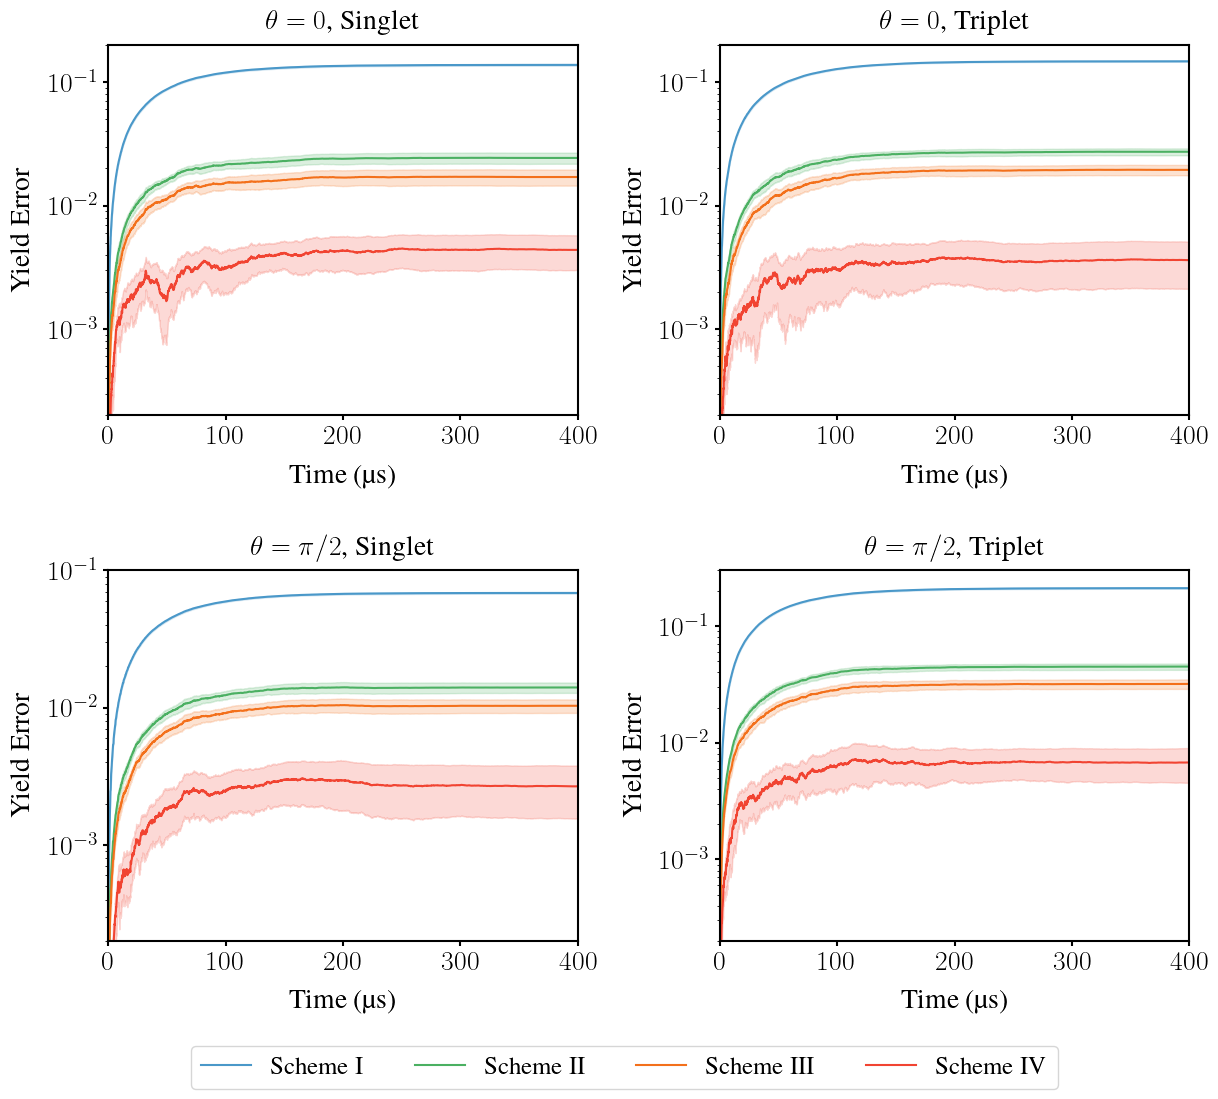

In [4]:
# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": font_size,
    "text.usetex": True,
    "axes.linewidth": spines_linewidth,
    "lines.linewidth": linewidth,
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# plot the data
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(w_pad=3, h_pad=4)
T = 400
step_num = 4000
tlist = np.linspace(0.0, T, step_num+1)
for i in range(len(ax[0])):
    for j in range(len(ax[1])):
        ax[i][j].set_xlabel(r'{Time ({\textmu s})}', labelpad=10)
        ax[i][j].set_ylabel(r'{Yield Error}', labelpad=10)
        ax[i][j].set_yscale('log')
        ax[i][j].set_xlim([0,T])
        ax[i][j].tick_params(width=spines_linewidth)
ax[0][0].set_ylim([2e-4,2*1e-1])
ax[0][1].set_ylim([2e-4,2*1e-1])
ax[1][0].set_ylim([2e-4,1*1e-1])
ax[1][1].set_ylim([2e-4,3*1e-1])

MeanNameS = [r'{Scheme I}', r'{Scheme II}', r'{Scheme III}', r'{Scheme IV}']
MeanNameT = [r'{Scheme I}', r'{Scheme II}', r'{Scheme III}', r'{Scheme IV}']
MeanDataS0 = [MeanSinglet0d_First, MeanSinglet0d_Second, MeanSinglet0d_Third, MeanSinglet0d_Fourth]
MeanDataT0 = [MeanTriplet0d_First, MeanTriplet0d_Second, MeanTriplet0d_Third, MeanTriplet0d_Fourth]
MeanDataS90 = [MeanSingelet90d_First, MeanSingelet90d_Second, MeanSingelet90d_Third, MeanSingelet90d_Fourth]
MeanDataT90 = [MeanTriplet90d_First, MeanTriplet90d_Second, MeanTriplet90d_Third, MeanTriplet90d_Fourth]
IntervalDataS0 = [IntervalSinglet0d_First, IntervalSinglet0d_Second, IntervalSinglet0d_Third, IntervalSinglet0d_Fourth]
IntervalDataS90 = [IntervalSingelet90d_First, IntervalSingelet90d_Second, IntervalSingelet90d_Third, IntervalSingelet90d_Fourth]
IntervalDataT0 = [IntervalTriplet0d_First, IntervalTriplet0d_Second, IntervalTriplet0d_Third, IntervalTriplet0d_Fourth]
IntervalDataT90 = [IntervalTriplet90d_First, IntervalTriplet90d_Second, IntervalTriplet90d_Third, IntervalTriplet90d_Fourth]

colormap_red = plt.get_cmap('Reds')
colormap_green = plt.get_cmap('Greens')
colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')

qsd_color_per = 0.6
shade_color_per = 0.2
color_list = [colormap_blue(qsd_color_per), colormap_green(qsd_color_per), colormap_orange(qsd_color_per), colormap_red(qsd_color_per)]

for j, (label_name, mean) in enumerate(zip(MeanNameS, MeanDataS0)):
    ax[0,0].plot(tlist, mean, label = label_name, color=color_list[j])
for j, interval in enumerate(IntervalDataS0):
    ax[0,0].fill_between(tlist, [i[0] for i in interval], [i[1] for i in interval], color=color_list[j],alpha=shade_color_per)
for j, (label_name, mean) in enumerate(zip(MeanNameT, MeanDataT0)):
    ax[0,1].plot(tlist, mean, label = label_name, color=color_list[j])
for j, interval in enumerate(IntervalDataT0):
    ax[0,1].fill_between(tlist, [i[0] for i in interval], [i[1] for i in interval], color=color_list[j], alpha=shade_color_per)
for j, (label_name, mean) in enumerate(zip(MeanNameS, MeanDataS90)):
    ax[1,0].plot(tlist, mean, label = label_name, color=color_list[j])
for j, interval in enumerate(IntervalDataS90):   
    ax[1,0].fill_between(tlist, [i[0] for i in interval], [i[1] for i in interval], color=color_list[j], alpha=shade_color_per)
for j, (label_name, mean) in enumerate(zip(MeanNameT, MeanDataT90)):
    ax[1,1].plot(tlist, mean, label = label_name, color=color_list[j])
for j, interval in enumerate(IntervalDataT90):
    ax[1,1].fill_between(tlist, [i[0] for i in interval], [i[1] for i in interval], color=color_list[j], alpha=shade_color_per)

ax[0,0].set_title(r'${{\theta} = 0}$, {Singlet}', y=1.02, fontsize=font_size)
ax[0,1].set_title(r'${{\theta} = 0}$, {Triplet}', y=1.02, fontsize=font_size)
ax[1,0].set_title(r'${{\theta} = \pi/2}$, {Singlet}', y=1.02, fontsize=font_size)
ax[1,1].set_title(r'${{\theta} = \pi/2}$, {Triplet}', y=1.02, fontsize=font_size)

ax[1,0].legend(fontsize=font_size-2, ncol=4, bbox_to_anchor=(0.15, -0.25))

plt.savefig('RPM_each_order_comp.pdf', dpi=600, bbox_inches='tight')

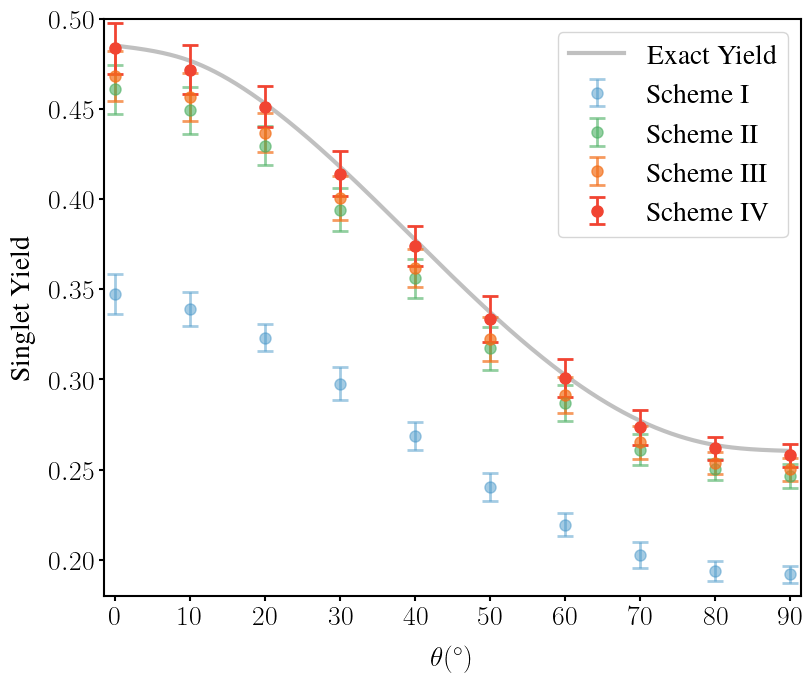

In [52]:
# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

colormap_red = plt.get_cmap('Reds')
colormap_green = plt.get_cmap('Greens')
colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')

qsd_color_per = 0.6
shade_color_per = 0.2
color_list = [colormap_blue(qsd_color_per), colormap_green(qsd_color_per), colormap_orange(qsd_color_per), colormap_red(qsd_color_per)]
alpha_list = [0.5, 0.6, 0.7, 1]

# results
file_list = sorted(glob.glob("RPM_data/comparison_linear_10000traj_4000step_47T_*d_*.npz"))  
exact_list = glob.glob('RPM_data/comparison_linear_10000traj_4000step_47T_*d_0.npz')
array_qsd = np.zeros((10, 20, 4001, 4))
array_exact = []

for idx, file in enumerate(file_list):
    with np.load(file) as npz_file:
        array = npz_file['qsd_result']
        array_qsd[idx // 20, idx % 20] = array[:, 0, :]

for file in exact_list:
    data = np.load(file)
    array_exact.append(data['exact_result'])

array_singlet_exact = np.array(array_exact)[:,0,:]
singlet_yield_exact = np.abs(np.max(array_singlet_exact, axis=1, keepdims=False)) # exact yields
singlet_yield = np.max(array_qsd, axis=2, keepdims=False)
mean_singlet_yield = np.mean(singlet_yield, axis=1, keepdims=False)
error_singlet_yield = np.std(singlet_yield, axis=1, ddof=1) # error bar

# plot
fig, ax1 = plt.subplots(figsize=(9, 7.5))
x = np.linspace(0, 90, 10)
legend_labels = [r'{Scheme I}', r'{Scheme II}', r'{Scheme III}', r'{Scheme IV}']
offset = [0, 0 , 0.2 , -0.1]
ax1.set_xlim([-1.5, 91.5])
ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax1.set_xticks(np.arange(0, 100, 10))
ax1.set_xlabel(r'$\theta (^\circ)$', fontsize=font_size, labelpad=10)
ax1.set_ylabel(r'Singlet Yield', fontsize=font_size, labelpad=10)

for i in range(4):
    plt.errorbar(x, mean_singlet_yield[:,i], fmt='o', yerr=error_singlet_yield[:,i]*2.861, 
                 elinewidth=2, capsize=6, capthick=2, markersize=8,label=legend_labels[i], color=color_list[i],alpha=alpha_list[i])

spline = InterpolatedUnivariateSpline(x, singlet_yield_exact)
xnew = np.linspace(0, 90 ,1000)
ynew = make_interp_spline(x, singlet_yield_exact, k=3, bc_type='natural')(xnew) 
ax1.plot(xnew, ynew, label='Exact Yield', linewidth=3, color='silver', zorder=0)    

plt.ylim(0.18, 0.50)
plt.legend(loc='upper right', fontsize=font_size)

plt.savefig('RPM_angle_yields.pdf', dpi=600, bbox_inches='tight')